Friday's Total Utility: 13.168244284489393
Initial Mass of the Crusonia Plant: 100.0
  Period        Consumption
Period 1               25.0
Period 2              26.25
Period 3 27.562500000000004
Period 4          28.940625


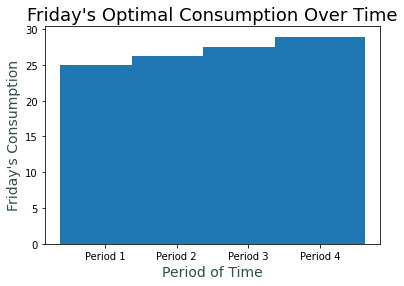

In [350]:
#Four-Period Crusonia Model
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

#Objective Function
def u(c1, c2, c3, c4):
    return math.log(c1) + ß*math.log(c2) + (ß**2)*math.log(c3) + (ß**3)*math.log(c4)
#Constraint
def c(c1, c2, c3, c4):
    return c1 + c2/π + c3/(π**2) + c4/(π**3)

#Parameters:
ß = 1.00
π = 1.05
c0 = 100

#A System of Equations for the Optimal Bundle:
A = np.array([[(1+ß+ß**2+ß**3),0, 0, 0], [0,(1+ß+ß**2+ß**3)/(ß*π), 0, 0], [0, 0 , (1+ß+ß**2+ß**3)/((ß**2)*(π**2)), 0], [0, 0 , 0, (1+ß+ß**2+ß**3)/((ß**3)*(π**3))]])
B = np.array([c0,c0, c0, c0])
C = np.linalg.solve(A, B)



#Optimal Choice in Periods 1 and 2:
c1 = C[0]
c2 = C[1]
c3 = C[2]
c4 = C[3]

#Total Utility 
print("Friday's Total Utility:", u(c1, c2, c3, c4))
print('Initial Mass of the Crusonia Plant:', c(c1, c2, c3, c4))

#Graph of Friday's Consumption Across Time
x = np.array(["Period 1", "Period 2", "Period 3", "Period 4"])
y = np.array([c1, c2, c3, c4])

fourperioddf = pd.DataFrame(data=np.column_stack((x,y)),columns=['Period','Consumption'])
print(fourperioddf.to_string(index=False))

plt.bar(x,y, width=1.25)

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}

plt.xlabel("Period of Time",  fontdict = font1)
plt.ylabel("Friday's Consumption",  fontdict = font1)
plt.title("Friday's Optimal Consumption Over Time", fontdict = font2)

plt.show()

In [351]:
sum(y)

107.753125

In [352]:
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))

income1 = c0/(sigma_sum(1, 5,lambda i: π**(1-i) ))
print("Friday's income in Period 1 is:",income1)

print("The product of Friday's discount factor and his Crusonia plant's productivity:",ß*π)

print("The ratio of Friday's consumption in Period 2 to his consumption in Period 1:",c2/c1)
print("The ratio of Friday's consumption in Period 3 to his consumption in Period 2:",c3/c2)
print("The ratio of Friday's consumption in Period 2 to his consumption in Period 1:",c4/c3)

if income1 > c1:
    print("Friday saves.")

if income1 < c1:
    print("Friday dissaves.")


if income1 == c1:
    print("Friday consumes his income.")

Friday's income in Period 1 is: 26.85826977175836
The product of Friday's discount factor and his Crusonia plant's productivity: 1.05
The ratio of Friday's consumption in Period 2 to his consumption in Period 1: 1.05
The ratio of Friday's consumption in Period 3 to his consumption in Period 2: 1.05
The ratio of Friday's consumption in Period 2 to his consumption in Period 1: 1.0499999999999998
Friday saves.


In [353]:
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))

income1 = c0/(sigma_sum(1, 5,lambda i: π**(1-i) ))
print(income1)


26.85826977175836


In [354]:
if income1 > c1:
    print("Friday saves.")

if income1 < c1:
    print("Friday dissaves.")


if income1 == c1:
    print("Friday consumes his income.")

Friday saves.


In [355]:
print(income1/c1)

1.0743307908703343


Friday's income in Period 1 is: 26.85826977175836
Friday's income in Period 2 is: 27.54064234734338
Friday's income in Period 3 is: 28.234756097560975
Friday's income in Period 4 is: 28.940624999999997
  Period             Income
Period 1  26.85826977175836
Period 2  27.54064234734338
Period 3 28.234756097560975
 Period4 28.940624999999997


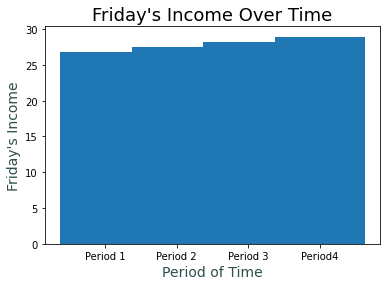

In [356]:
#Working Out the Time Path of Friday's Income:

#Period 1
income1 = c0/(sigma_sum(1, 5,lambda i: π**(1-i) ))
print("Friday's income in Period 1 is:",income1)

#Period 2 

capital2 = π*(c0-c1)
income2 = π*(c0-c1)/(sigma_sum(1, 4,lambda i: π**(1-i) ))

print("Friday's income in Period 2 is:",income2)

#Period 3
capital3 = π*(π*(c0-c1)-c2)

income3 = π*(π*(c0-c1)-c2)/(sigma_sum(1, 3,lambda i: π**(1-i) ))
print("Friday's income in Period 3 is:",income3)

income4 =  π*(π*(π*(c0-c1)-c2)-c3)/(sigma_sum(1, 2,lambda i: π**(1-i) ))
print("Friday's income in Period 4 is:",income4)


#Data Frame for the Time Path:
timearray = np.array(["Period 1", "Period 2", "Period 3", "Period4"])
incomearray = np.array([income1, income2, income3, income4])

incomedf = pd.DataFrame(data=np.column_stack((timearray,incomearray)),columns=['Period','Income'])
print(incomedf.to_string(index=False))

plt.bar(timearray,incomearray, width=1.25)

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}

plt.xlabel("Period of Time",  fontdict = font1)
plt.ylabel("Friday's Income",  fontdict = font1)
plt.title("Friday's Income Over Time", fontdict = font2)

plt.show()

In [357]:
#Some Comparisons
print("The ratio between Friday's Period 1 income and consumption is:", income1/c1)
print("The ratio between Friday's Period 2 income and consumption is:", income2/c2)
print("The ratio between Friday's Period 3 income and consumption is:", income3/c3)

print("The ratio of Friday's Period 2 to Period 1 income is:", income2/income1)
print("The ratio of Friday's Period 3 to Period 2 income is:",income3/income2)



print("The difference between Friday's Period 2 and Period 1 consumption is:",c2-c1)
print("The difference between Friday's Period 2 and Period 1 income is:",income2-income1)

print("The difference between Friday's Period 3 and Period 2 consumption is:",c3-c2)
print("The difference between Friday's Period 3 and Period 2 income is:",income3-income2)

The ratio between Friday's Period 1 income and consumption is: 1.0743307908703343
The ratio between Friday's Period 2 income and consumption is: 1.049167327517843
The ratio between Friday's Period 3 income and consumption is: 1.0243902439024388
The ratio of Friday's Period 2 to Period 1 income is: 1.025406423473434
The ratio of Friday's Period 3 to Period 2 income is: 1.0252032520325203
The difference between Friday's Period 2 and Period 1 consumption is: 1.25
The difference between Friday's Period 2 and Period 1 income is: 0.6823725755850205
The difference between Friday's Period 3 and Period 2 consumption is: 1.3125000000000036
The difference between Friday's Period 3 and Period 2 income is: 0.6941137502175962


In [358]:
#More comparisons:
#Differences Between Periods 2 and 1:
print(c2-c1)
print(income2-income1)

#Differences Between Periods 3 and 2:
print(c3-c2)
print(income3-income2)

#Differences Between Periods 4 and 3:
print(c4-c3)
#There is no measure of income inn Period 4 as the plant ceases to be capital inn the terminal period




1.25
0.6823725755850205
1.3125000000000036
0.6941137502175962
1.3781249999999972


In [359]:
#Testing out my accounting factor:

def accountingfactor(t):
    return sum(π**(1-x) for x in range(1, (5-t)+1)) /  sum(ß**(x-1) for x in range(1, (5-t)+1))

print(accountingfactor(1))
print(sigma_sum(1, 5,lambda i: π**(1-i))/sigma_sum(1, 5,lambda i: ß**(i-1)))

print(accountingfactor(2))
print(sigma_sum(1, 4,lambda i: π**(1-i))/sigma_sum(1, 4,lambda i: ß**(i-1)))

print(accountingfactor(3))
print(sigma_sum(1, 3,lambda i: π**(1-i))/sigma_sum(1, 3,lambda i: ß**(i-1)))

print(accountingfactor(4))
print(sigma_sum(1, 2,lambda i: π**(1-i))/sigma_sum(1, 2,lambda i: ß**(i-1)))

print(accountingfactor(2)/accountingfactor(1))
print(accountingfactor(3)/accountingfactor(2))
print(accountingfactor(4)/accountingfactor(3))

0.9308120073426196
0.9308120073426196
0.9531368102796675
0.9531368102796675
0.9761904761904762
0.9761904761904762
1.0
1.0
1.023984223195383
1.0241871530531323
1.024390243902439


In [411]:
accountingfactor(1)*income1

25.0

In [361]:
#The Time Path of Friday's Capital:

capital1 = c0
capital2 = π*(c0-c1)
capital3 = π*(π*(c0-c1)-c2)
capital4 =  π*((π*(π*(c0-c1)-c2))-c3)

capitalarray = np.array([c0, π*(c0-c1), π*(π*(c0-c1)-c2), π*((π*(π*(c0-c1)-c2))-c3)])
print(capitalarray)

print(capital2/capital1)
print(capital3/capital2)
print(capital4/capital3)

rate1 = capital2/capital1 - 1
print(rate1)
rate2 = capital3/capital2 - 1
print(rate2)
rate3 = capital4/capital3 - 1
print(rate3)

[100.        78.75      55.125     28.940625]
0.7875
0.7
0.5249999999999999
-0.21250000000000002
-0.30000000000000004
-0.4750000000000001


In [362]:
print((1+rate1)*capital1)

78.75


In [363]:
ratio1 = sigma_sum(1, 4,lambda i: π**(1-i) )/sigma_sum(1, 4,lambda i: ß**(i-1) )
print(ratio1)

0.9531368102796675


In [364]:
#Computing the Accounting Factors:
print(sigma_sum(1, 4,lambda i: π**(1-i)))
print(sigma_sum(1, 4,lambda i: ß**(i-1)))

#Period 1's Consumption:

c1equiv = (sigma_sum(1, 5,lambda i: π**(1-i))/sigma_sum(1, 5,lambda i: ß**(i-1)))*income1 
print(c1)
print(c1equiv)


#Period 2's Consumption:
c2equiv = (sigma_sum(1, 4,lambda i: π**(1-i))/sigma_sum(1, 4,lambda i: ß**(i-1)))*income2
print(c2)
print(c2equiv) 

#Period 3's Consumption:
c3equiv = (sigma_sum(1, 3,lambda i: π**(1-i))/sigma_sum(1, 3,lambda i: ß**(i-1)))*income3
print(c3)
print(c3equiv)


#Period 4's Consumption:
c4equiv = (sigma_sum(1, 2,lambda i: π**(1-i))/sigma_sum(1, 2,lambda i: ß**(i-1)))*income4
print(c4)
print(c4equiv)


2.8594104308390023
3.0
25.0
25.0
26.25
26.25
27.562500000000004
27.5625
28.940625
28.940624999999997


In [365]:
sum(x ** 2 for x in range(1, 6))

55

In [366]:
sum(π**(1-x) for x in range(1, 4))

2.8594104308390023

In [367]:
def y(v0, t):
    g = 9.81                  # Acceleration of gravity
    return v0*t - 0.5*g*t**2

def accountingparameter(t):
    return sum(π**(1-x) for x in range(1, t+1))

print(accountingparameter(4))

print(sigma_sum(1, 5,lambda i: π**(1-i)))

3.7232480293704784
3.7232480293704784


In [373]:
def consumption(t):
    return C[t-1]

def consumptiontest(t):
    if t == 1:
        return c1
    if t == 2:
        return c2
    if t == 3:
        return c3
    if t == 4:
        return c4

print(consumption(4))



print(consumptiontest(4))


28.940625
28.940625


In [ ]:
consumption(4)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
sigma_sum(1, 5,lambda i: π**(1-i))/sigma_sum(1, 5,lambda i: ß**(i-1))

0.9308120073426196

In [ ]:
consumption(4)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [408]:
data = [[c1, capital1, income1],
        [c2, capital2, income2],
        [c3, capital3, income3],
        [c4, capital4, income4]]

print(data)

summarydf = pd.DataFrame(data,
                        columns= ['Consumption', 'Capital', 'Income'],
                        index = ['Period 1', 'Period 2', 'Period 3', 'Period 4'])

print(summarydf)

[[25.0, 100, 26.85826977175836], [26.25, 78.75, 27.54064234734338], [27.562500000000004, 55.125, 28.234756097560975], [28.940625, 28.940624999999997, 28.940624999999997]]
          Consumption     Capital     Income
Period 1    25.000000  100.000000  26.858270
Period 2    26.250000   78.750000  27.540642
Period 3    27.562500   55.125000  28.234756
Period 4    28.940625   28.940625  28.940625


In [407]:
def capital_function(t):
    # Base case: 1! = 1
    if t == 1:
        return c0

    # Recursive case: n! = n * (n-1)!
    else:
        return π*(capital_function(t-1)-C[t-2])

print(capital_function(1))
print(capital_function(2))
print(capital_function(3))
print(capital_function(4))


100
78.75
55.125
28.940624999999997


In [402]:
print(factorial_recursive(1)-C[1])
print(π*(factorial_recursive(1)-C[0]))
print(C[1])

73.75
78.75
26.25


In [384]:
π*(factorial_recursive(2-1)-C[2-1])

77.4375

In [ ]:
print(C[0])
print(C[1])
print(C[2])
print(C[3])

25.0
26.25
27.562500000000004
28.940625


In [ ]:
factorial_recursive(3